In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, floor
import pywt

In [25]:
folder='../datasets'
filename='/gold-prices.csv'
fname=f"{folder}/{filename}"
import os.path
os.path.isfile(fname) 

True

In [26]:
df = pd.read_csv(fname, header=None, usecols=[0], names=['data'], 
                 thousands=',',dtype={'data':np.float64}, verbose=True)
# lineterminator=','  --> user for certain CSV files

Tokenization took: 1.81 ms
Type conversion took: 0.90 ms
Parser memory cleanup took: 0.00 ms


In [27]:
df

,data
0,226.0
1,226.0
2,226.8
3,218.6
4,223.2
...,...
10611,1526.0
10612,1537.9
10613,1546.1
10614,1529.1


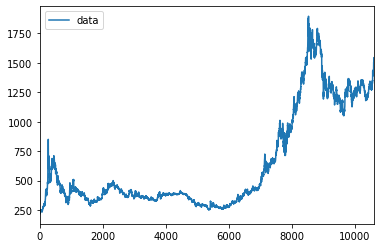

In [28]:
df.plot.line()

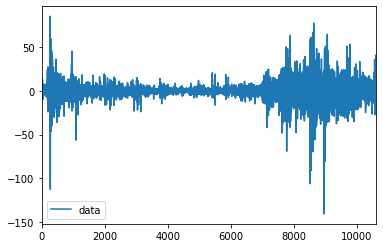

In [29]:
df.diff().plot.line()

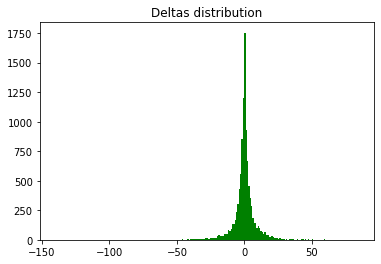

In [38]:
from math import ceil
plt.title("Deltas distribution")
deltas = df['data'].diff().shift(-1).to_list()
count, bins, ignored  = plt.hist(deltas, int(ceil(max(deltas))-ceil(min(deltas))), color='green')

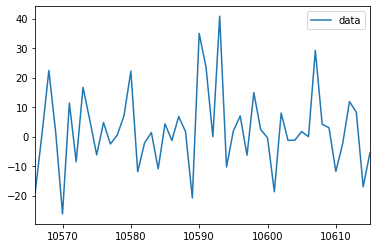

In [30]:
df.diff().tail(50).plot.line()

In [50]:
norm_diffs = [1 if deltas[t] > 0 else 0 if deltas[t] == 0 else -1 for t in range(len(deltas)-200, len(deltas))]

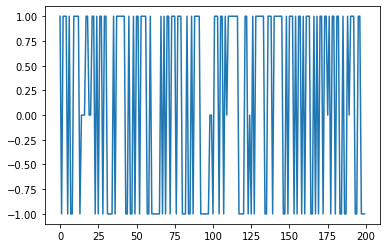

In [52]:
plt.plot(norm_diffs)
plt.show()

In [54]:
direction = []
direction_index = 0
curr_value = norm_diffs[0]
direction.append(1 if curr_value > 0 else -1)

for i in range(1, len(norm_diffs)):
    if norm_diffs[i] == curr_value:
        if curr_value >= 0:
            direction[direction_index] += 1
        elif curr_value < 0:
            direction[direction_index] -= 1
    else:
        curr_value = norm_diffs[i]
        direction_index += 1
        direction.append(1 if curr_value > 0 else -1)

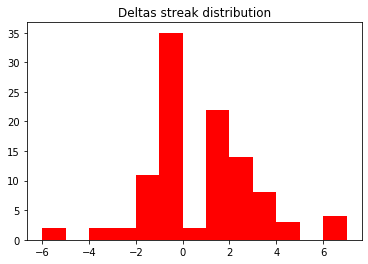

In [55]:
from math import ceil
plt.title("Deltas streak distribution")
count, bins, ignored  = plt.hist(direction, int(ceil(max(direction))-ceil(min(direction))), color='red')